In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
#%matplotlib inline
sys.path.append('../SourceCode')
import bastien_utils
import morphoMaths                                                        

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"

In [32]:
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
print('x_test shape:', x_test.shape)

x_test shape: (10000, 28, 28, 1)


In [4]:
from scipy import io

In [17]:
data = {'fashion_MNIST_x_test':x_test}

In [18]:
io.savemat('../../../fashion_MNIST_x_test', data)

In [12]:
x_test = x_test.reshape((10000, 28*28))

In [13]:
x_test.shape

(10000, 784)

In [14]:
x_test = x_test.transpose()

In [15]:
x_test.shape

(784, 10000)

In [19]:
data = io.loadmat('../../../18_08_21_test_sparse_NMF/nmfsc_dim100_0_06_x_small.mat')

In [22]:
W = data['W']
H = data['H']

In [24]:
W.shape

(784, 100)

In [28]:
x_rec_nmf = np.dot(W,H).transpose().reshape(10, 28, 28, 1)

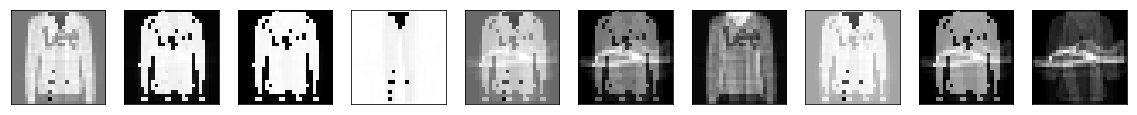

In [30]:
bastien_utils.plot_all_images(x_rec_nmf)

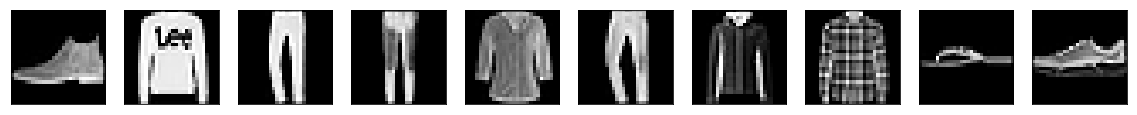

In [33]:
bastien_utils.plot_all_images(x_test[:10])